<a href="https://colab.research.google.com/github/harshelke180502/Breast_Cancer_Detection/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np # numpy - to create array of tiles and store it in a list
import pandas as pd # pandas - to create dataframes
import matplotlib.pyplot as plt # matplotlib - to create graphs
%matplotlib inline
import seaborn as sns # seaborn - to create visualisations
import cv2 # cv2 - to import computer vision
import glob # glob - used to recursively import files in a folder with similar naming tag
import random # random - to suffle the elements in an array

In [ ]:
import numpy
numpy.version.version

'1.23.4'

In [ ]:
import tensorflow as tf # tensorflow - importing deeplearning library tensorflow for building CNN model

In [ ]:
print(tf.__version__)

2.9.0


In [ ]:
from os import listdir
# os - operating system library used to connect the code to local system to save files
from sklearn.metrics import classification_report
# sklearn classification report - used build a text report showing the main classification metrics
from tensorflow.keras.models import Sequential
# sequential model - used for a plain stack of layers where each layer has exactly one input tensor and one output tensor
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow importing convolutional layer, dense, max pooling, flatten, dropout, batch normalization
from tensorflow.keras.optimizers import SGD
# stochastic gradient descent optimizer - includes support for momentum, learning rate decay and nesterov momentum

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#importing the images
#breast_img = glob.glob('/Users/mayank/Desktop/Python projects /karkinos/Modelling data', recursive = True)
breast_img = glob.glob('/Users/mayank/Desktop/Python projects /karkinos/Modelling data/*/*_*.png',recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

/Users/mayank/Desktop/Python projects /karkinos/Modelling data/0/rotated2_23.png
/Users/mayank/Desktop/Python projects /karkinos/Modelling data/0/rotated65_40.png
/Users/mayank/Desktop/Python projects /karkinos/Modelling data/0/rotated71_35.png


In [ ]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-11] == '1' :
        P_IDC.append(img)
# if the path of the image has 1 in modeling data
# (/Users/mayank/Desktop/Python projects /karkinos/Tile Images/Modelling data/1/2_23.png),
# all the images in the '1' folder will get appended in the P_IDC array list.
    else:
        N_IDC.append(img)
# if the path of the image has 0 in modeling data
# (/Users/mayank/Desktop/Python projects /karkinos/Tile Images/Modelling data/0/rotated2_23.png),
# all the images in the '0' folder will get appended in the N_IDC array list.

In [ ]:
from tensorflow.keras.preprocessing import image
# used for image processing and augmentation

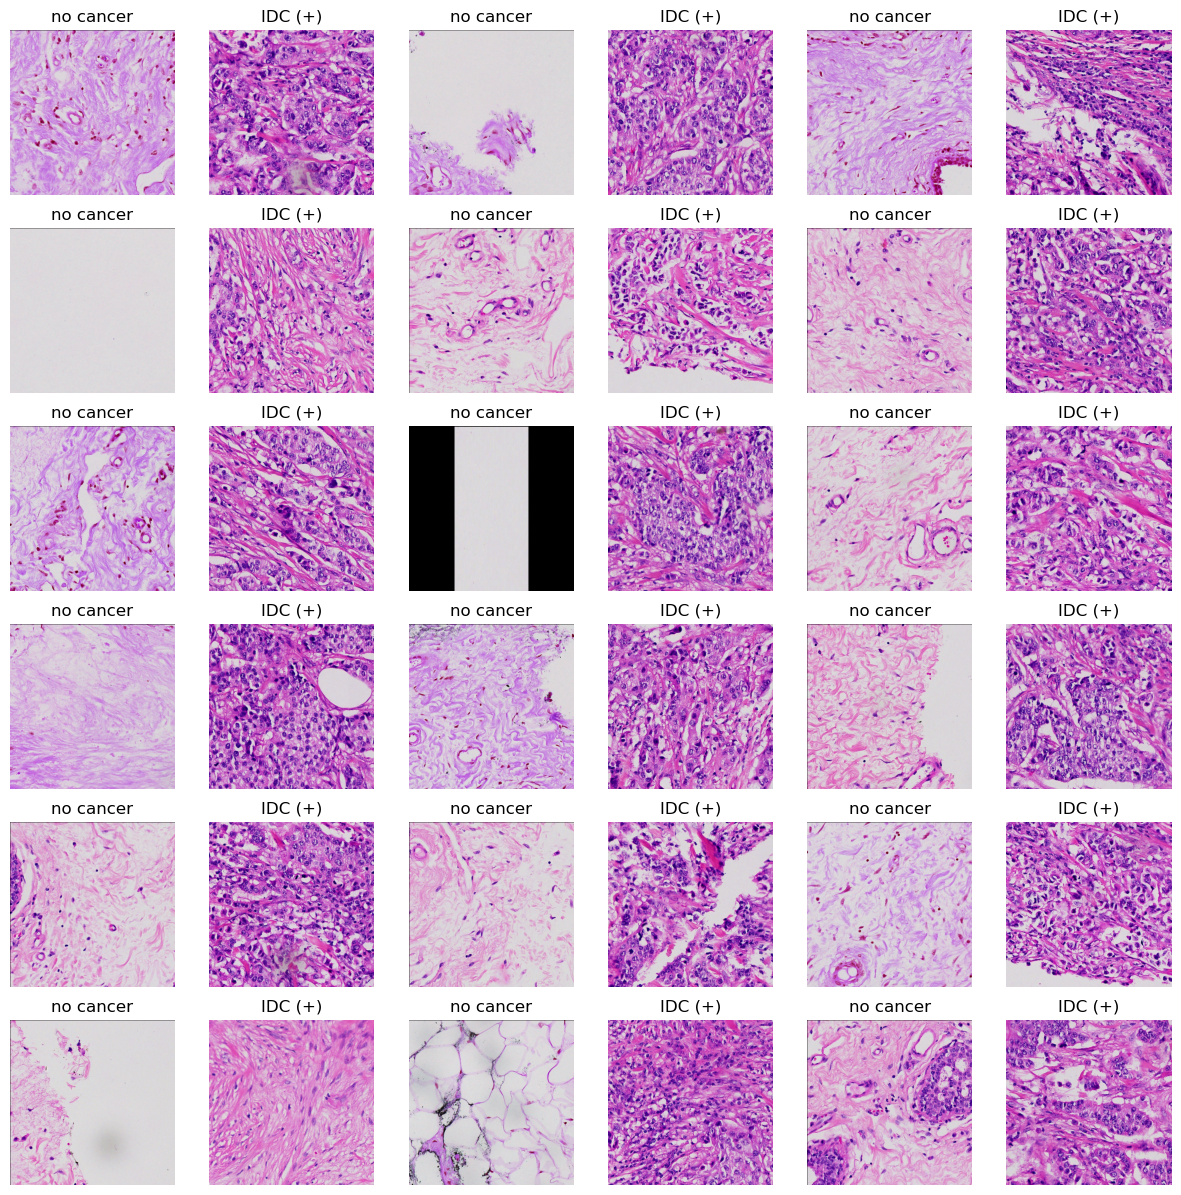

In [ ]:
from keras.preprocessing import image
# used for image processing and augmentation

plt.figure(figsize = (15, 15))
# Resizing the tiles into 15x15 units

some_non = np.random.randint(0, len(N_IDC), 18)
# Random shuffliing of the data in order to select and display few of the images, some_non -> some of the non-cancerous tiles
some_can = np.random.randint(0, len(P_IDC), 18)
# Random shuffliing of the data in order to select and display few of the images, some_cam -> some of the cancerous tiles

# for non-cancerous tiles
s = 0
for num in some_non:

        img = tf.keras.utils.load_img((N_IDC[num]), target_size=(500, 500))
        # used to load images and resize using keras
        img = tf.keras.utils.img_to_array(img)
        # convert image to array

        # to display some of the tiles from non-cancerous folder
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

# for cancerous tiles
s = 1
for num in some_can:

        img = tf.keras.utils.load_img((P_IDC[num]), target_size=(500, 500))
        img = tf.keras.utils.img_to_array(img)

        # to display some of the tiles from non-cancerous folder
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [ ]:
non_img_arr = []
# new array created to save the images processed through computer vision,
# we can't save these new images in the old list because that will create an infinite loop
can_img_arr = []
# new array created to save the images processed through computer vision

# this for loop takes in images from N_IDC, processes it through computer vision for reading the RGB values and resizing it to 500 pixels
# then saving it to a new array non_img_arr
for img in N_IDC:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (500, 500), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

# this for loop takes in images from P_IDC, processes it through computer vision for reading the RGB values and resizing it to 500 pixels
# then saving it to a new array can_img_arr
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (500, 500), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [ ]:
# here we have created 2 arrays, X and y, X array will have all the features of the image so basically the tiles
# and y array will have all the labels of the corresponding tiles in X array.
X = []
y = []

# first we merge all the tiles from non_img_arr array and can_img_arr array into one array and then perform random suffling of the tiles
breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

# the tiles and their labels are then seperated one by one into 2 arrays X and y
for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
# this tells us the number of IDC(-) and IDC(+) images
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 982
Number of IDC(-) Images: 833
Number of IDC(+) Images: 149
Image shape (Width, Height, Channels): (500, 500, 3)


In [ ]:
# now we perform train-test split on data into 80-20, 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# to_categorical - converts a class vector (integers) to binary class matrix
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (785, 500, 500, 3)
Testing Data Shape: (197, 500, 500, 3)


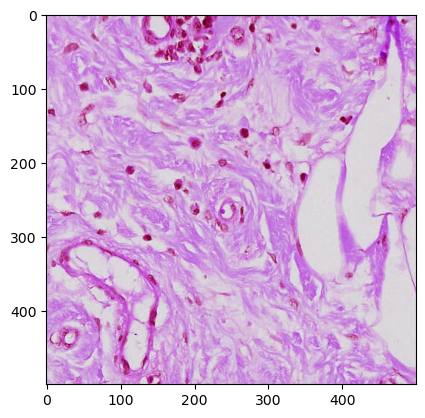

In [ ]:
# using matplotib to display one of the tile from the training dataset
plt.imshow(X_train[0])

In [ ]:
# Adam and SGD are stochastic gradient descent optimizer that works on adaptive estimations
# Gradient descent is useful in adjusting the weights in hidden layers
from tensorflow.keras.optimizers import Adam, SGD
# binary_crossentropy - calculates the binary crossentropy loss
from keras.metrics import binary_crossentropy
# Early Stopping - stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
# sklearn confusion matrix module - generates and prints confusion matrix
from sklearn.metrics import confusion_matrix
# itertools - used for matrix multiplication in CNN
import itertools

In [ ]:
#code to use GPU system instead of CPU for buiding the model, CPU is by default

if tf.config.list_physical_devices('GPU'):
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
    tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4000)])

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(500, 500, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-19 17:29:28.999617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-19 17:29:29.000458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 500, 500, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 500, 500, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 32)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 32)     128       
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 11, batch_size = 35)

Epoch 1/11


2023-06-19 17:29:39.796984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-19 17:29:40.543108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.8382

2023-06-19 17:31:39.024813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 126s 5s/step - loss: 0.6945 - accuracy: 0.8382 - val_loss: 0.6856 - val_accuracy: 0.8477
Epoch 2/11
23/23 [==============================] - 116s 5s/step - loss: 0.6768 - accuracy: 0.8484 - val_loss: 0.6741 - val_accuracy: 0.8477
Epoch 3/11
23/23 [==============================] - 112s 5s/step - loss: 0.6645 - accuracy: 0.8484 - val_loss: 0.6613 - val_accuracy: 0.8477
Epoch 4/11
23/23 [==============================] - 121s 5s/step - loss: 0.6508 - accuracy: 0.8484 - val_loss: 0.6474 - val_accuracy: 0.8477
Epoch 5/11
23/23 [==============================] - 125s 5s/step - loss: 0.6366 - accuracy: 0.8484 - val_loss: 0.6317 - val_accuracy: 0.8477
Epoch 6/11
23/23 [==============================] - 133s 6s/step - loss: 0.6202 - accuracy: 0.8484 - val_loss: 0.6141 - val_accuracy: 0.8477
Epoch 7/11
23/23 [==============================] - 142s 6s/step - loss: 0.6021 - accuracy: 0.8484 - val_loss: 0.5944 - val_accuracy: 0.8477
Epoch 8/11
23/23 [======

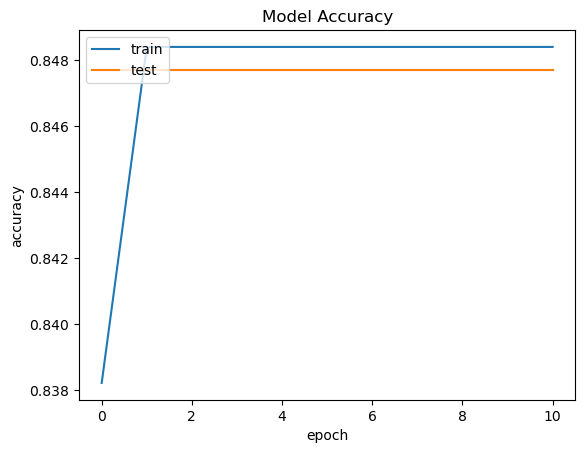

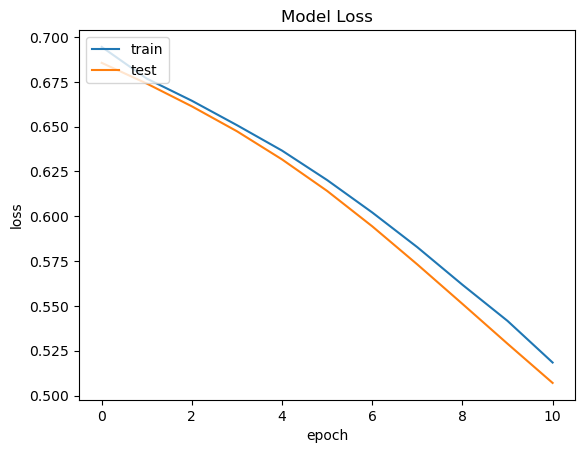

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2023-06-19 18:00:40.230544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 8s 1s/step


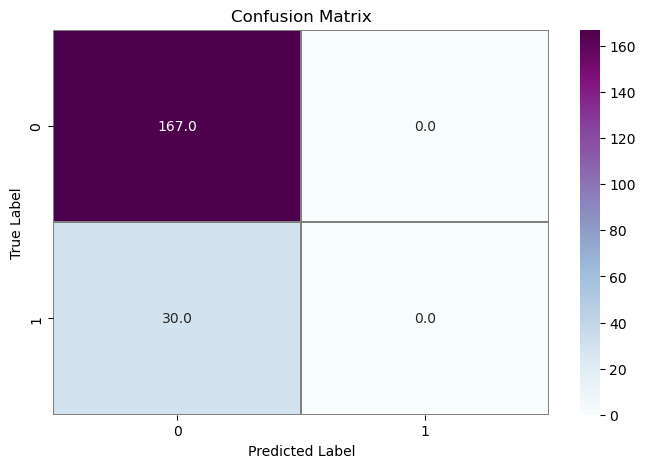

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 90
img_plot(X_test, index)

In [ ]:
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using cnn model',pred)
print("True Value",label)